<a href="https://colab.research.google.com/github/c04chd03/Hello-World-/blob/master/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libararies 

In [1]:
import pandas as pd
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt

# Loading data 

In [2]:
data = pd.read_csv('/content/data.csv')

# Coverting dataframe to a numpy array 

In [3]:
data = np.array(data)

# Reading input and output array from data

In [4]:
X = data[:,:3]
Y = data[:,3]

# Initializing parameters

In [5]:
w = np.random.rand (3,)

In [6]:
# Maximum number of iterations.
max_iter = 500

# define an error vector to save all error values over all iterations.
error_all = []

# Learning rate for gradient descent.
eta = 0.5

# Training process in a for loop

In [32]:
for iter in range (0,max_iter):
    

    Y_hat = sps.expit(np.dot(X,w))
    
# =============================================================================
#     Compute the error below
# =============================================================================
    e = 0
    
    # Add this error to the end of error vector.
    e = -1/max_iter * np.sum( np.multiply(np.log(Y_hat), Y) + np.multiply(np.log(1-Y_hat), (1-Y)))

    #append error value in the error_all vector
    error_all.append(e)
    
    # Gradient of the error
    grad_e = np.mean(np.multiply((Y_hat - Y), X.T), axis=1)
    
    w_old = w
    w = w - eta*grad_e
    
    
    print ('epoch {0:d}, negative log-likelihood {1:.4f}, w={2}'.format(iter, e, w.T))

epoch 0, negative log-likelihood 0.1000, w=[ 1.45104311 -1.72511511 -8.27564202]
epoch 1, negative log-likelihood 0.1000, w=[ 1.45260724 -1.72570758 -8.28003719]
epoch 2, negative log-likelihood 0.0999, w=[ 1.45262462 -1.72636776 -8.28467477]
epoch 3, negative log-likelihood 0.0999, w=[ 1.45405635 -1.72696516 -8.28907721]
epoch 4, negative log-likelihood 0.0999, w=[ 1.45419171 -1.72761918 -8.29368171]
epoch 5, negative log-likelihood 0.0999, w=[ 1.45551026 -1.72822055 -8.2980884 ]
epoch 6, negative log-likelihood 0.0999, w=[ 1.45574567 -1.72886908 -8.30266281]
epoch 7, negative log-likelihood 0.0998, w=[ 1.45696777 -1.72947359 -8.30707113]
epoch 8, negative log-likelihood 0.0998, w=[ 1.45728769 -1.73011723 -8.31161804]
epoch 9, negative log-likelihood 0.0998, w=[ 1.45842781 -1.73072414 -8.31602576]
epoch 10, negative log-likelihood 0.0998, w=[ 1.45881879 -1.7313634  -8.32054742]
epoch 11, negative log-likelihood 0.0998, w=[ 1.45988943 -1.7319721  -8.3249526 ]
epoch 12, negative log-lik

# Plot error over iterations

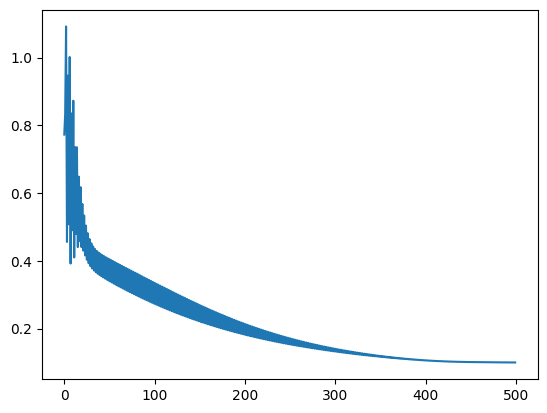

In [36]:
plt.plot(range(max_iter), error_all)


In [37]:
# New Learning rate for gradient descent.
newlearning_rates = [0.5, 0.3, 0.1, 0.05, 0.01]
error_all_rates = []

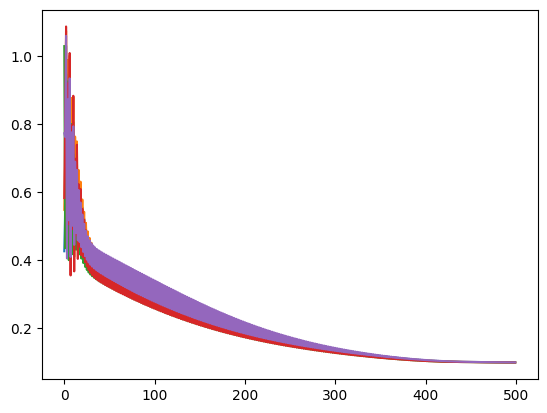

In [38]:
for restarting in newlearning_rates:
  # We start over the initial parameters
    w = np.random.rand(3,)  
    error_all = []  #Initialize error vector for each learning rate

    for iter2 in range(max_iter):
        Y_hat = sps.expit(np.dot(X, w))
        e2 = -1/max_iter * np.sum( np.multiply(np.log(Y_hat), Y) + np.multiply(np.log(1-Y_hat), (1-Y)))
        error_all.append(e2)

        grad_e = np.mean(np.multiply((Y_hat - Y), X.T), axis=1)

        w_old = w
        w = w - eta * grad_e

    error_all_rates.append(error_all)

# Plot error values for different learning rates
for i in range(len(newlearning_rates)):
    plt.plot(range(max_iter), error_all_rates[i])


In [39]:
#Scenario for the stochastic gradient descent
# New Learning rate for gradient descent.
newlearning_rates2 = [0.5, 0.3, 0.1, 0.05, 0.01]
error_all_rates2 = []

In [46]:
for restarting2 in newlearning_rates2:
    w = np.random.rand(3,)  # Re-initialize parameters for each learning rate
    error_all = []  # Initialize error vector for each learning rate

    for iter in range(max_iter):
        # Randomly shuffle the training data (I copy these three lines from github to complete the plot.)
        indexes = np.random.permutation(len(X))
        X_shuffled = X[indexes]
        Y_shuffled = Y[indexes]

        for i in range(len(X)):
            x = X_shuffled[i]
            Y = Y_shuffled[i]
            Y_hat = sps.expit(np.dot(x, w))

            # Compute the error for the current example
            e3 = -1/max_iter * np.sum( np.multiply(np.log(Y_hat), Y) + np.multiply(np.log(1-Y_hat), (1-Y)))
            error_all.append(e3)

            # Compute the gradient for the current example
            grad_e = (Y_hat - Y) * X

            # Update the parameters
            w = w - eta * grad_e

    error_all_rates2.append(error_all)

# Plot error values for stochastic gradient descent
for i in range(len(newlearning_rates2)):
    plt.plot(range(max_iter), error_all_rates2[i])


IndexError: ignored